## 🧠 Deep Neural Networks

$\text{Single Neuron Recap}$ 

In the previous tutorial we have seen how to implement a *single neuron* neural network for both of regression and classification.

For instance, in case of binary classification:

<font color="pink"> 1. **Define the hypothesis function**</font>  as the logistic function applied to the linear combination of input features and parameters:
   $$ ŷ = f(x; \theta) = f(w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n) = \sigma(w^T u) \quad \text{where} \quad \sigma(z) = \frac{1}{1 + e^{-z}}$$
      
<font color="pink"> 2. **Define the loss function**</font>  as the cross-entropy loss function:
   $$J(\theta) = -\frac{1}{M} \sum_{m=1}^{M} \left[ y_m \log(ŷ_m) + (1 - y_m) \log(1 - ŷ_m) \right] $$

<font color="pink"> 3. **Train the model** </font> by iteratively applying gradient descent:
$$ w_{t+1} = w_t - \alpha \frac{\partial J(w_t)}{\partial w} $$

- Recall that $J(w)$ (and it's derivative) are considered functions of the weight vector $w$ only because the data computed in the loss function is constant. 

- Also recall that we had to use a numerical method such as gradient descent because it was infeasible to set $\frac{\partial J(w_t)}{\partial w} = 0$; we were only aple to compute $\frac{\partial J(w_t)}{\partial w}$.

Meanwhile, the same scheme can be used for regression except that $f(z)=z$ (i.e., no function is applied on the linear combination) and the loss function measures an actual difference. E.g.,
$$J(w) = Σ_{m=1}^{M} (w^t u_m -y_m)^2$$

The issue with such models is that they are linear when the vast majority of datasets are not:

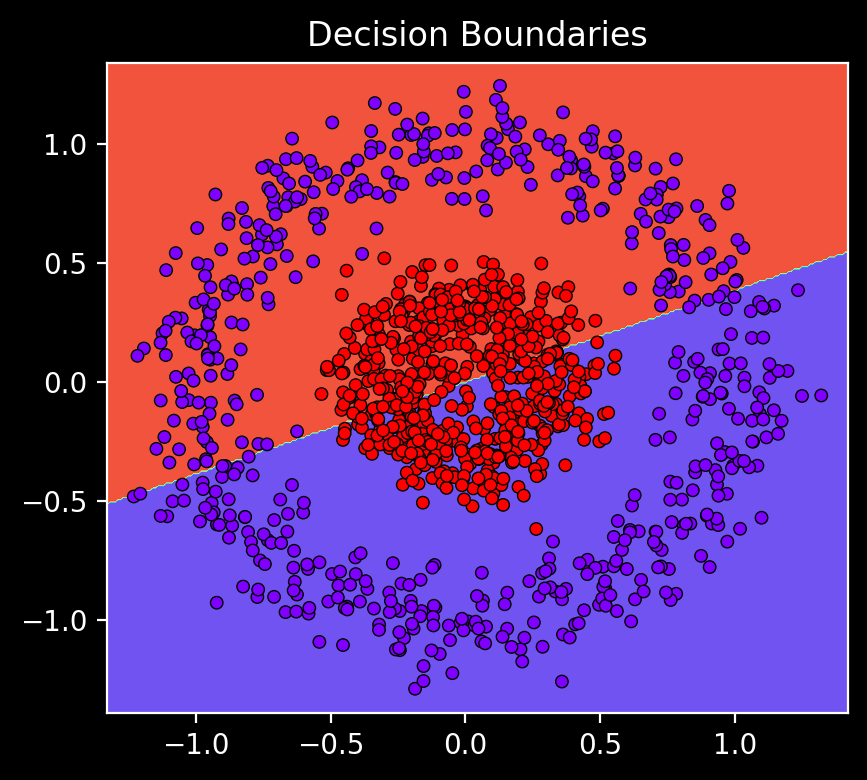

In [1]:
from Neuron import LogisticRegression               # from last tutorial
from sklearn.datasets import  make_circles
from Plot import plot_model_contours

x_data, y_data = make_circles(n_samples=1200, random_state=42, factor=0.3, noise=0.12)

# Fit-Predict Pipeline
lr = LogisticRegression()
lr.fit(x_data, y_data)
plot_model_contours(lr, x_data, y_data, trained=True)

<font color="aqua"> 

$\text{Extending to Deep Networks}$ 

</font>

As you have covered in the lecture, for a neural network:

<font color="pink"> **1. Define the hypothesis function**: </font>

- In a neural network, the hypothesis function is a sequence of $L$ <font color="orange"> weight matrix multiplications </font> (as defined below) that sequentially transforms the $n$ dimensional input $x$ to $n_1,n_2,...,n_L$ dimensions respectively (i.e., $n_L$ is the final output dimension) and where each matrix multiplication is followed by a <font color="orange">nonlinear activation function </font> (i.e., $f_1, f_2, ..., f_L$) respectively, that applies element-wise on the output vector.

That is,
$$
x
\xrightarrow{f_1(W^{(1)}x+b^{(1)})} 
Y^{(1)}
\xrightarrow{f_2(W^{(2)}Y^{(1)}+b^{(2)})}
Y^{(2)}
\xrightarrow{\dots}
Y^{(L-1)}
\xrightarrow{f_L(W^{(L)}Y^{(L-1)}+b^{(L)})}
Y^{(L)}
$$
Which we can write more verbosely as:
$$
x_{(n,1)}
\xrightarrow{f_1(W^{(1)}_{(n_1,n)}x_{(n,1)}+b^{(1)}_{(n_1,1)})}
Y^{(1)}_{(n_1,1)}
\xrightarrow{f_2(W^{(2)}_{(n_2,n_1)}Y^{(1)}_{(n_1,1)}+b^{(2)}_{(n_2,1)})}
Y^{(2)}_{(n_2,1)}
\xrightarrow{\dots}
Y^{(L-1)}_{(n_{L-1},1)}
\xrightarrow{f_L(W^{(L)}_{(n_L,n_{L-1})}Y^{(L-1)}_{(n_{L-1},1)}+b^{(L)}_{(n_L,1)})}
Y^{(L)}_{(n_L,1)}
$$

Note that we usually add bias explictly than have it in $u$ to avoid needing to append $1$ to each layer.
<details>
<summary><b>Example:</b></summary>
<div align="center">
<img src="https://i.imgur.com/CUdktNK.png" width=700>
</div>

For instance, for this neural network we have $L=3$ where $(n_1, n_2, n_3) = (4, 4, 1)$ and we can write its expression as:

- We don't count the input layer in $L$ because it only provides the input $u$ of dimensionality $n$ and does not correspond to a matrix multiplcation. Ideally the plot shouldn't make it look like other layers but it's widely used by people.

- In this network:
<div align="center">


| Operation at L=1 | Operation at L=2 | Operation at L=3 |
|----------|----------|----------|
| I.e., "Hidden Layer 1" | I.e., "Hidden Layer 2" | I.e., "Output Layer" |
| $Y_{(4,1)}^{(1)} = f_1(W_{(4,3)}x_{(3,1)}+b^{(1)}_{(4,1)})$ | $Y_{(4,1)}^{(2)} = f_2(W_{(4,4)}Y^{(1)}_{(4,1)}+b^{(2)}_{(4,1)}$ | $Y_{(1,1)}^{(3)} = f_3(W_{(1,4)}Y^{(2)}_{(4,1)}+b^{(3)}_{(1,1)})$ |

</div>

- Should be clear that every layer of index $l$ (except the input layer) corresponds to a weight matrix of dimensions $W_{(n_l,n_{l-1})}$ and a bias vector of dimensions $b_{n_l}$

- Note that the plot itself does not define $f_1, f_2, f_3$ which are part of the mathematical (i.e., actual) definition

- As an exercise, assume $f_3$ is the sigmoid function and that $f_1$ and $f_2$ are the ReLU functions and try to write the hypothesis function in one line on paper.
</details>



<details>
<summary><b>Conclusions:</b></summary>


- To define the neural network (i.e., its hypothesis function):

   - We need to choose as a hyperparameter the number of layers $L$ (we call the first $L-1$ of them hidden layers and the last, the output layer.)

   - We need to choose the number of neurons per layer (i.e., $n_1$, $n_2$,...,$n_L$). 
   
      - In case of binary classification and regression tasks our prediction can be a single probability/value and we set $n_L=1$ but we will see other cases later

   - We need to choose the activation functions $f_1, f_2, ..., f_L$. Typically can use the same function for all of them except for the output layer (e.g., in binary classification we need to get a probility so we must use Sigmoid)
</details>

<details>
<summary><b>Rationale:</b></summary>
<br>
<table border="1">
  <tr>
    <td>

Our problem with the single neuron model we have seen above is that it's linear. As machine learning engineers, we know that casting the data into a new space where the data becomes approximately linear can solve the nonlinearity problem.<br><br>That is, given an input feature vector (while training or inference) $x_1,x_2,...,x_n$ we can cast it into a $p$-dimensional space and perform classification there:
$$
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    ... \\
    x_n
\end{bmatrix}
\xrightarrow{z=f(x)}
\begin{bmatrix}
    z_1 \\
    z_2 \\
    z_3 \\
    ... \\
    z_{p}
\end{bmatrix}
\xrightarrow{classification}
f(w_0 + w_1z_1 + w_2z_2 + \ldots + w_nz_n) = \sigma(w^T u)
$$

Many classical machine learning models use this idea already as we have seen (kernels). However, they treat the transformation as a constant which hinders the ability of obtaining adequate fits of the data (i.e., it's easy to show that great transformations are data-dependent).

In a neural network, a layer $l$ does a weight matrix multiplication followed by a nonlinear activation (i.e., $f_l(W Y^{(l-1)}+b)$) which is exactly a nonlinear transformation defined by $W$ and $f$ that transforms the input vector $Y^{(l-1)}$ of dimensionality $n_{(l-1)}$ into another $Y^{(L)}$ of dimensionality $n_l$ via the weight matrix $W_{(n_l,n_{l-1})}$ (and the bias vector $b_{n_{l-1}}$ to allow shifting).

These transformations are the basis of deep learning and they outperform the classical machine learning transformations because they are learnable (i.e., by training on the data sets $W$ which defines the transformation) and because stacking them results in more and more complexity which helps when tackling hard problems (e.g., image and audio).
</td>
  </tr>
</table>

Back to logistic regression, you can easily show that it acts like a single neuron of a neural network because:

$$ Y^{(l)} =
\begin{bmatrix}
    Y^{(l)}_1 \\
    Y^{(l)}_2 \\
    Y^{(l)}_3 \\
    ... \\
    Y^{(l)}_{n_l}
\end{bmatrix}
= f_l(W Y^{(l-1)} + b) =
\begin{bmatrix}
    f_l(w_1 ⋅ Y^{(l-1)} + b_1) \\
    f_l(w_2 ⋅ Y^{(l-1)} + b_2) \\
    f_l(w_3 ⋅ Y^{(l-1)} + b_3) \\
    ... \\
    f_l(w_{n_{l}} ⋅ Y^{(l-1)} + b_{n_{l}})
\end{bmatrix}
$$

That is, the output of each neuron in the $l$ layer performs the same operation as logistic regression if $f_l$ is the sigmoid function. In this our notation assumes $w_1, w_2, ..., w_{n_l}$ to be the rows of $W^l$ and $b_1, b_2, ..., b_{n_l}$ to be the elements of the bias vector $b^{(l)}$.

</details>

<font color="pink"> **2. Define the loss function**: </font>

- As we known this depends on the task where the two most popular options are squared loss and cross-entropy loss:

<div align="center">

| Regression                          | Classification                                                                                 |
|-------------------------------|-----------------------------------------------------------------------------------------------|
| $ J(\theta) = \frac{1}{2M} \sum_{m=1}^{M} (y_m - \hat{y}_m)^2$         | $ J(\theta) = -\frac{1}{M} \sum_{m=1}^{M} \left[ y_m \log(\hat{y}_m) + (1 - y_m) \log(1 - \hat{y}_m) \right]$ |

</div>

- In our case, $ŷ_m$ is $Y^L$ (i.e., the output from the output layer when the network is given $x_m$) and $y_m$ is the true label.

- In general, we can also use any other loss function, so long as minimizing it makes sense.

<font color="pink"> 3. **Train the model** </font> by iteratively applying gradient descent (or any other optimizer):
$$ w_{t+1} = w_t - \alpha \frac{\partial J(w_t)}{\partial w} $$ 
for every single weight matrix or bias vector in the network.

- You should be aware that setting $\frac{\partial J(w_t)}{\partial w} = 0$ is certainly unfeasible because the fact that $Y^L$ is a complex expression straightforwardly implies that $J$ and it's derivative also are (which is why we must use an optimziation algorithm like GD).

  - In fact, deriving the expression of $\frac{\partial J(w_t)}{\partial w}$ is nontrivial; it requires a whole algorithm called Backpropagation

- As we know, to compute $J$ or it's derivative we need to compute the output of the network for all the training examples ${(x_1,y_1), (x_2, y_2),...,(x_m,y_m)}$. However, it can be sometimes be too big for our VRAM to hold this amount of data and it may not have the best optimization properties.

  - As you (likely) covered in the lecture, we still converge, if in each iteration, we only input some random sample (i.e., batch) of the data instead of the whole data and in this case, the algorithm is called mini-batch gradient descent.



## 🤔 Rationale:

Adding to what we mentioned in the rationale section above, neural networks are fantastic machine learning models because:

- Unlike most classical machine learning models they don't make assumptions on the data (e.g., linearity, normality, correlation, etc.)


- Unlike classical machine learning models, there is no specific bound to the model's complexity (i.e., adding more nerons or more layers will always increase complexity)

   - Hence, they are used for unstructured data which usually is too complex to fit (e.g., images, text, audio, etc.)

   - It can be visually seen that the transformations that the layers learn sometimes correspond to actual meaningful features we can understand (hence, we mentioned before they automate feature extraction)

- This scalability property makes them, unlike classical machine learning models, able to make use of of big data

#### Let's verify their ability to fit nonlinear data:

The following uses a neural network implemented via PyTorch in `Torch.py`. Don't worry we will delve into that with detail after the next tutorial and you will implement your own neural network from scratch in this lab. This is only to showcase the ability of neural networks and ensure that PyTorch works on your machine.

You must be able to run the following:

In [2]:
from Torch import ClassificationNN, plot_classification

Epochs: 100%|██████████| 250/250 [00:11<00:00, 21.86it/s, loss=0.000197]


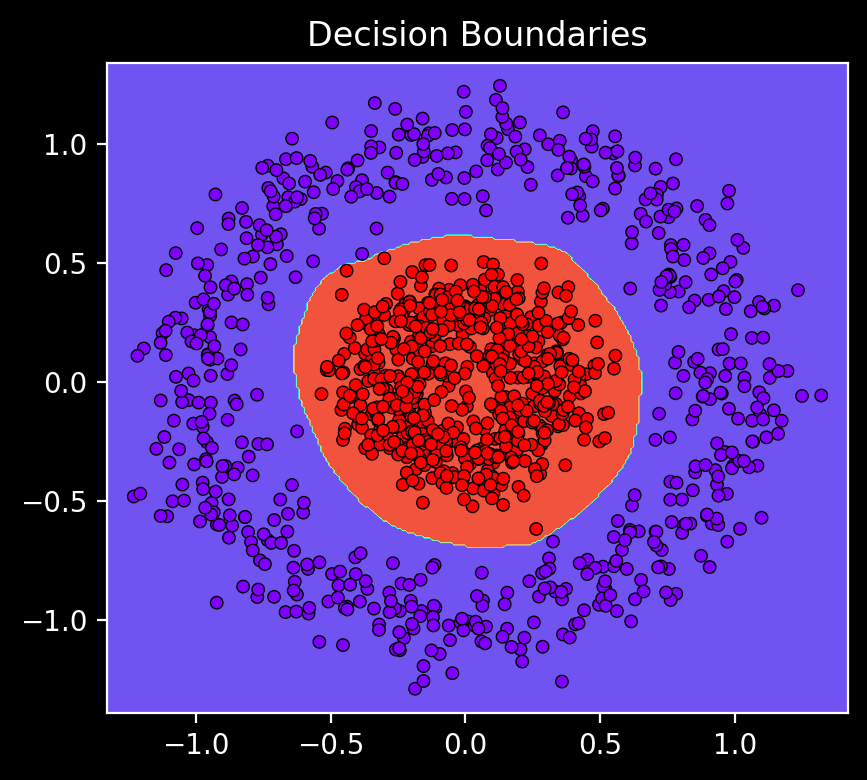

In [3]:
model =  ClassificationNN()
model.fit(x_data, y_data, epochs=250)
plot_model_contours(model, x_data, y_data, trained=True)

### 🌐 Universal Approximation Theorem:

In fact, a neural network, with at least one hidden layer, is a universal approximator any continuous function (or three or more hidden layers for discontinuous functions).

That is, whatever is the function mapping $x$ to $y$ in your dataset, there exists a neural network with at least three hidden layers and some number of neurons that can fit it to any accuracy. In other words, there are "no bounds" to how nonlinear (i.e., complex) your model can get. Hence, NNs success in text, image and audio data (most interesting!).


<details>
<summary><b>See an instance of the theorem:</b></summary>
<img src="https://i.imgur.com/sCujL12.png">
</details>

Let's check that out ourselves. We have designed a very complex binary classifcation dataset in `dataset.csv`; let's see how complex it is by training the model on it:

You must be able to run the following:

Epochs: 100%|██████████| 1000/1000 [08:09<00:00,  2.04it/s, loss=0.0856]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


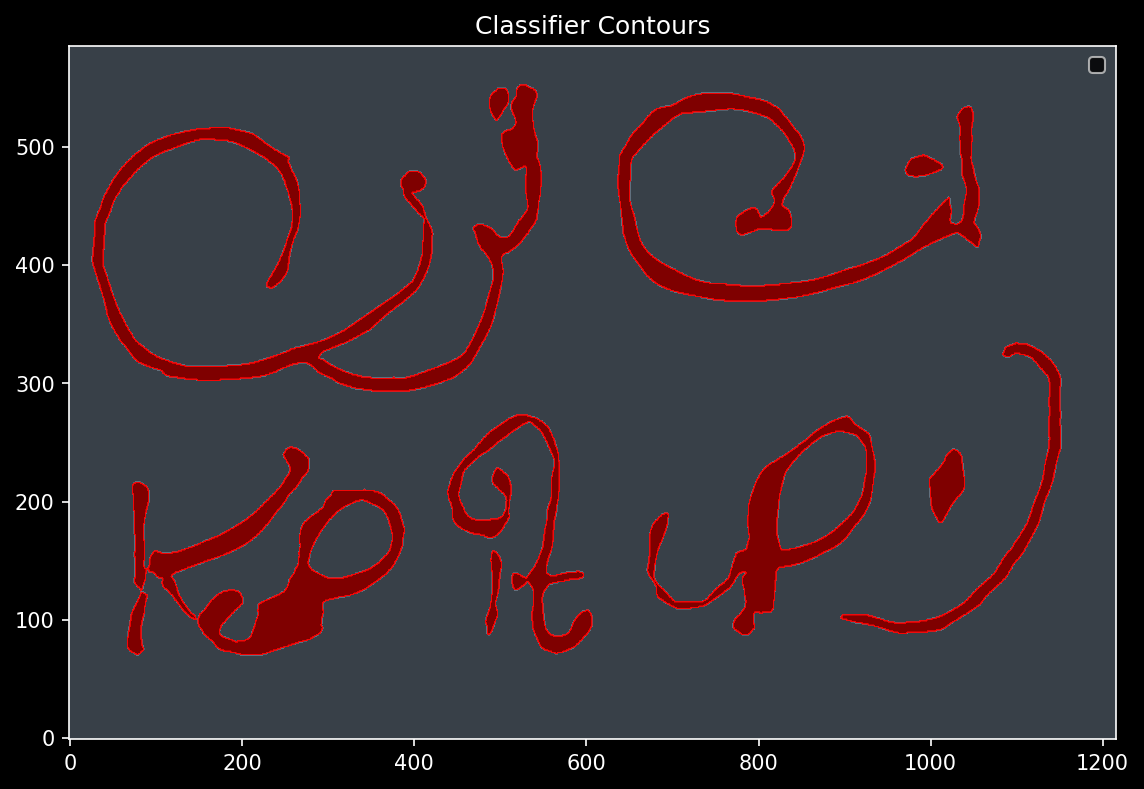

In [4]:
import torch
import numpy as np
import pandas as pd

torch.manual_seed(42)

# Load and normalize the dataset
dataset = df = pd.read_csv('dataset.csv').values
x_data, y_data = dataset[:, :2], dataset[:, 2:]    
       
μ = np.mean(x_data, axis=0)
σ = np.std(x_data, axis=0)
x_data = (x_data - μ) / σ

# Define and train your model
model = ClassificationNN()
model.fit(x_data, y_data, epochs=1000)           # An ideal setting is perhaps epochs=2500. Try not to go much lower than 1000 so it converges

# Evaluate model on whole domain to see what function is approximated:
plot_classification(model, x_data, μ, σ)

What do you think? Quite complex data, eh?